## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [14]:
# Your code here - remember to use markdown cells for comments as well!

In [50]:
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.graph_objs as go
import plotly.express as px

import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
pio.renderers.default = 'notebook_connected'

In [51]:
csv_file_path = "data/kc_house_data.csv"


In a dataframe name "king_county_df" load "kc_house_data.csv" file in the cell below using "pd.read_csv" format

In [52]:
# reading the data into the king_county_df
king_county_df=pd.read_csv("data/kc_house_data.csv")
king_county_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [53]:
king_county_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Here are the key columns in the datasets:**

**id:** Unique identifier for each house sale.

**date:** Date of the house sale.

**price:** Sale price of the house.

**bedrooms:** Number of bedrooms in the house.

**bathrooms:** Number of bathrooms in the house.

**sqft_living:** Square footage of the living area.

**sqft_lot:** Square footage of the lot.

**floors:** Number of floors in the house.

**waterfront:** Whether the house has a waterfront view (0 for no, 1 for yes).

**condition:** Overall condition of the house.

**grade:** Overall grade given to the housing unit, based on King County grading system.

**sqft_above:** Square footage of the house above ground level.

**sqft_basement:** Square footage of the basement.

**yr_built:** Year the house was built.

**yr_renovated:** Year the house was renovated.

**zipcode:** Zip code of the house location.

**lat:** Latitude coordinate of the house.

**long:** Longitude coordinate of the house.

**sqft_living15:** Average square footage of interior housing living space for the nearest 15 neighbors.

**sqft_lot15:** Average square footage of the land lots of the nearest 15 neighbors.

Now lets get familiar with the data we have in our king_county_df. This step will include
1. Understanding the dimentionality of our dataset
2. Investigating what type of data it contains, and the data types used to store it
3. Dicovering how missing values are encoded, and how many there are
4. Getting a feel for what information it does and doesn't contain

In the cell below,lets inspect the overall shape of the dataframe

Let's look at the info printout:

In [54]:
#Checking data shape
king_county_df.shape

(21597, 21)

In [55]:
#Checking dataframe info
king_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In the cell below, interpret that information. Do the data types line up with what we expect? Are there any missing values?

In [21]:
"""
The data types seem to line up with what we expect. The columns
containing strings are type object, whereas the columns containing
decimal numbers and full numbers are type float64 and int64 respectively.

Some columns have missing values, notably waterfront, view, and yr_renovated. Additionally, 
sqft_basement is stored as an object type, which might need conversion to a numerical type for analysis.
"""

'\nThe data types seem to line up with what we expect. The columns\ncontaining strings are type object, whereas the columns containing\ndecimal numbers and full numbers are type float64 and int64 respectively.\n\nSome columns have missing values, notably waterfront, view, and yr_renovated. Additionally, \nsqft_basement is stored as an object type, which might need conversion to a numerical type for analysis.\n'

In [56]:
king_county_df.isna().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Data Cleaning Steps

1.Convert date column to datetime format.

2.Convert sqft_basement column to numeric format.

**date: We convert this column to datetime format using pd.to_datetime.**

In [57]:
# 1. Convert 'date' to datetime format
king_county_df['date'] = pd.to_datetime(king_county_df['date'])

**sqft_basement: We convert this column to numeric using pd.to_numeric. Setting errors='coerce' ensures that any non-numeric values are converted to NaN.**

In [58]:
# 2. Convert 'sqft_basement' to numeric, coerce errors to NaN
king_county_df['sqft_basement'] = pd.to_numeric(king_county_df['sqft_basement'], errors='coerce')

# Handling Missing values

**waterfront: Since it's a categorical variable (likely binary), we impute missing values with 0 assuming houses without waterfront.**

In [59]:
# Impute 'waterfront' with 0 if missing
king_county_df['waterfront'].fillna(0, inplace=True)

**view: We impute missing values with the median view score, assuming a central tendency measure.**

In [60]:
# Impute 'view' with median value
median_view = king_county_df['view'].median()
king_county_df['view'].fillna(median_view, inplace=True)

**yr_renovated: We impute missing values with 0 assuming no renovation year recorded.**

In [61]:
# Impute 'yr_renovated' with 0 if missing
king_county_df['yr_renovated'].fillna(0, inplace=True)

**sqft_basement: After conversion, we check and fill any remaining NaNs with 0.**

In [62]:
# Verify if 'sqft_basement' has any remaining NaNs after conversion and fill them with 0
king_county_df['sqft_basement'].fillna(0, inplace=True)

# Verification:

**We check for any remaining missing values after these operations to ensure the dataset is clean.**

In [64]:
# Check for any remaining missing values in the dataset
missing_values = king_county_df.isnull().sum()
print("Remaining missing values:\n", missing_values[missing_values > 0])

Remaining missing values:
 Series([], dtype: int64)


In [65]:
king_county_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Summary Statistics

Let's generate summary statistics for numerical columns to understand the distribution of data. This will provide us with statistical information such as mean, standard deviation, minimum, maximum, and quartile values for numerical features.

In [30]:
#Summary statistics for numerical columns
king_county_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.006760      0.233181      3.409825   
std    4.141264e+04      0.539683      0.081944      0.764673      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21597.000000  21597.000000  21597.000000   
mean       7.657915   1788.596842     285.716581   1970.999676     68.758207   
std        1.173200    827.759761     439.819830     29.375234    364.037499   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     550.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

Let's visualize the distributions of numerical columns using histograms. 

This will give us an idea of how house prices are distributed in the dataset.

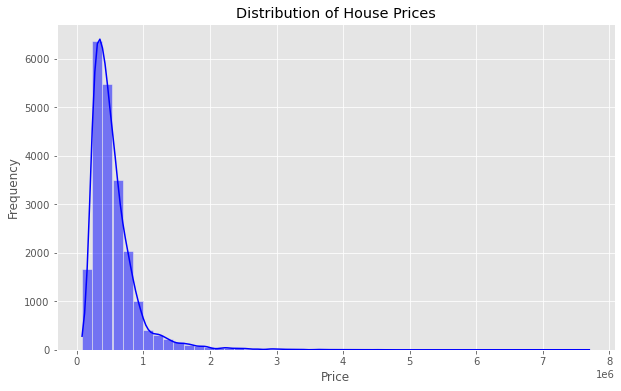

In [31]:
# Histogram of house prices
plt.figure(figsize=(10, 6))
sns.histplot(king_county_df['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Observation: All extraneous and placeholder values have be catered for and we can see that all the values fall withing acceptable parameters which may include outliers

Explore relationships between numerical variables using scatter plots.

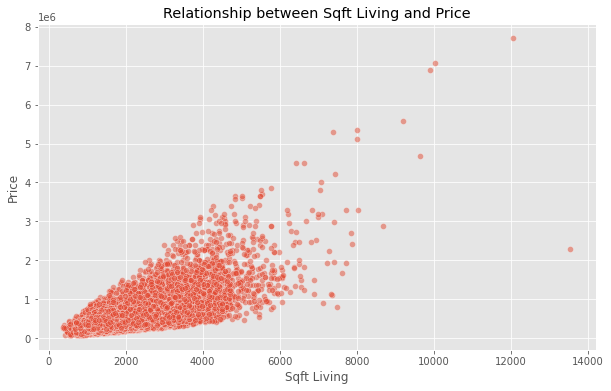

In [32]:
# Scatter plot of sqft_living vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=king_county_df, alpha=0.5)
plt.title('Relationship between Sqft Living and Price')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

This will help us understand how square footage of living space (sqft_living) relates to house prices (price).

Checking fot null values

In [33]:
king_county_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [34]:
#FUNCTIONS TO BE USED DURING DATA CLEANING

#Function to get the number of duplictes
def get_duplicates(df):
    df=df[df.duplicated(keep=False)]
    return df

# Function to get extraneous values i.e. values that look like placeholders or are exaggerated values
def extraneous_values(df):
    for col in df.columns:
        print(col, '\n', df[col].value_counts(normalize=True), '\n')


In [35]:
# Checking the counts for each value in the column waterfront
king_county_df["waterfront"].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [36]:
# Function to calculate percentage of missing data in a column
def missing_data(df, column):
    length_of_df=len(df)                                                    #getting the length of the dataframe
    missing_data= column.isna().sum()                                       #total number of missing data in column foreign_gross
    percentage_of_missing_data = round((missing_data/length_of_df*100),2)   #percentage of missing data in the foreign_gross column
    return print(f"Percentage of Missing Data: {percentage_of_missing_data}""%")

In [37]:
# percentage of missing data
missing_data(king_county_df, king_county_df["waterfront"])

# Replacing Nan Values in Waterfront column
king_county_df["waterfront"].fillna(king_county_df["waterfront"].mode()[0], inplace= True)
king_county_df["waterfront"].value_counts()

Percentage of Missing Data: 0.0%


0.0    21451
1.0      146
Name: waterfront, dtype: int64

Observation:

The Null values account for 11% of the dataset. While dropping these rows would be possible, we would lose quite a bit of data for this dataset and this may affect or skew the results. As the most common value is NO we assume that the NaN values are also NO and replace with it.

In [38]:
# Checking the counts for each value in the column yr_renovated
king_county_df["yr_renovated"].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [39]:
# percentage of missing data
missing_data(king_county_df,king_county_df["yr_renovated"])

# Replacing NaN values in yr_renovated column
king_county_df["yr_renovated"].fillna(king_county_df["yr_renovated"].mode()[0], inplace= True)
king_county_df["yr_renovated"].value_counts()

Percentage of Missing Data: 0.0%


0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

Observation: Similar to the Waterfront column, dropping the missing data would greatly affect the dataset and hence we shall replace the Nan values with 0.0 which is the most common value in the column

In [40]:
# Checking the counts for each value in the column view
king_county_df["view"].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [41]:
# percentage of missing data
missing_data(king_county_df, king_county_df["view"])

# Dropping NaN values in view column
king_county_df.dropna(subset=["view"], inplace=True)
king_county_df["view"].value_counts(normalize=True)

Percentage of Missing Data: 0.0%


0.0    0.902209
2.0    0.044312
3.0    0.023522
1.0    0.015280
4.0    0.014678
Name: view, dtype: float64

Observation: The percentage of missing date is less than 1% of the dataset. We can drop these rows without causing much effect to the overall dataset.

In [42]:
king_county_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

Now lets check that the missing values are delted with

In [43]:
king_county_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Observation:

The null values that were present in the dataset have now been resolved either by dropping the rows or replacing them.
The dataframe now contains 21,534 entries with no null values present.

**Pair plot**

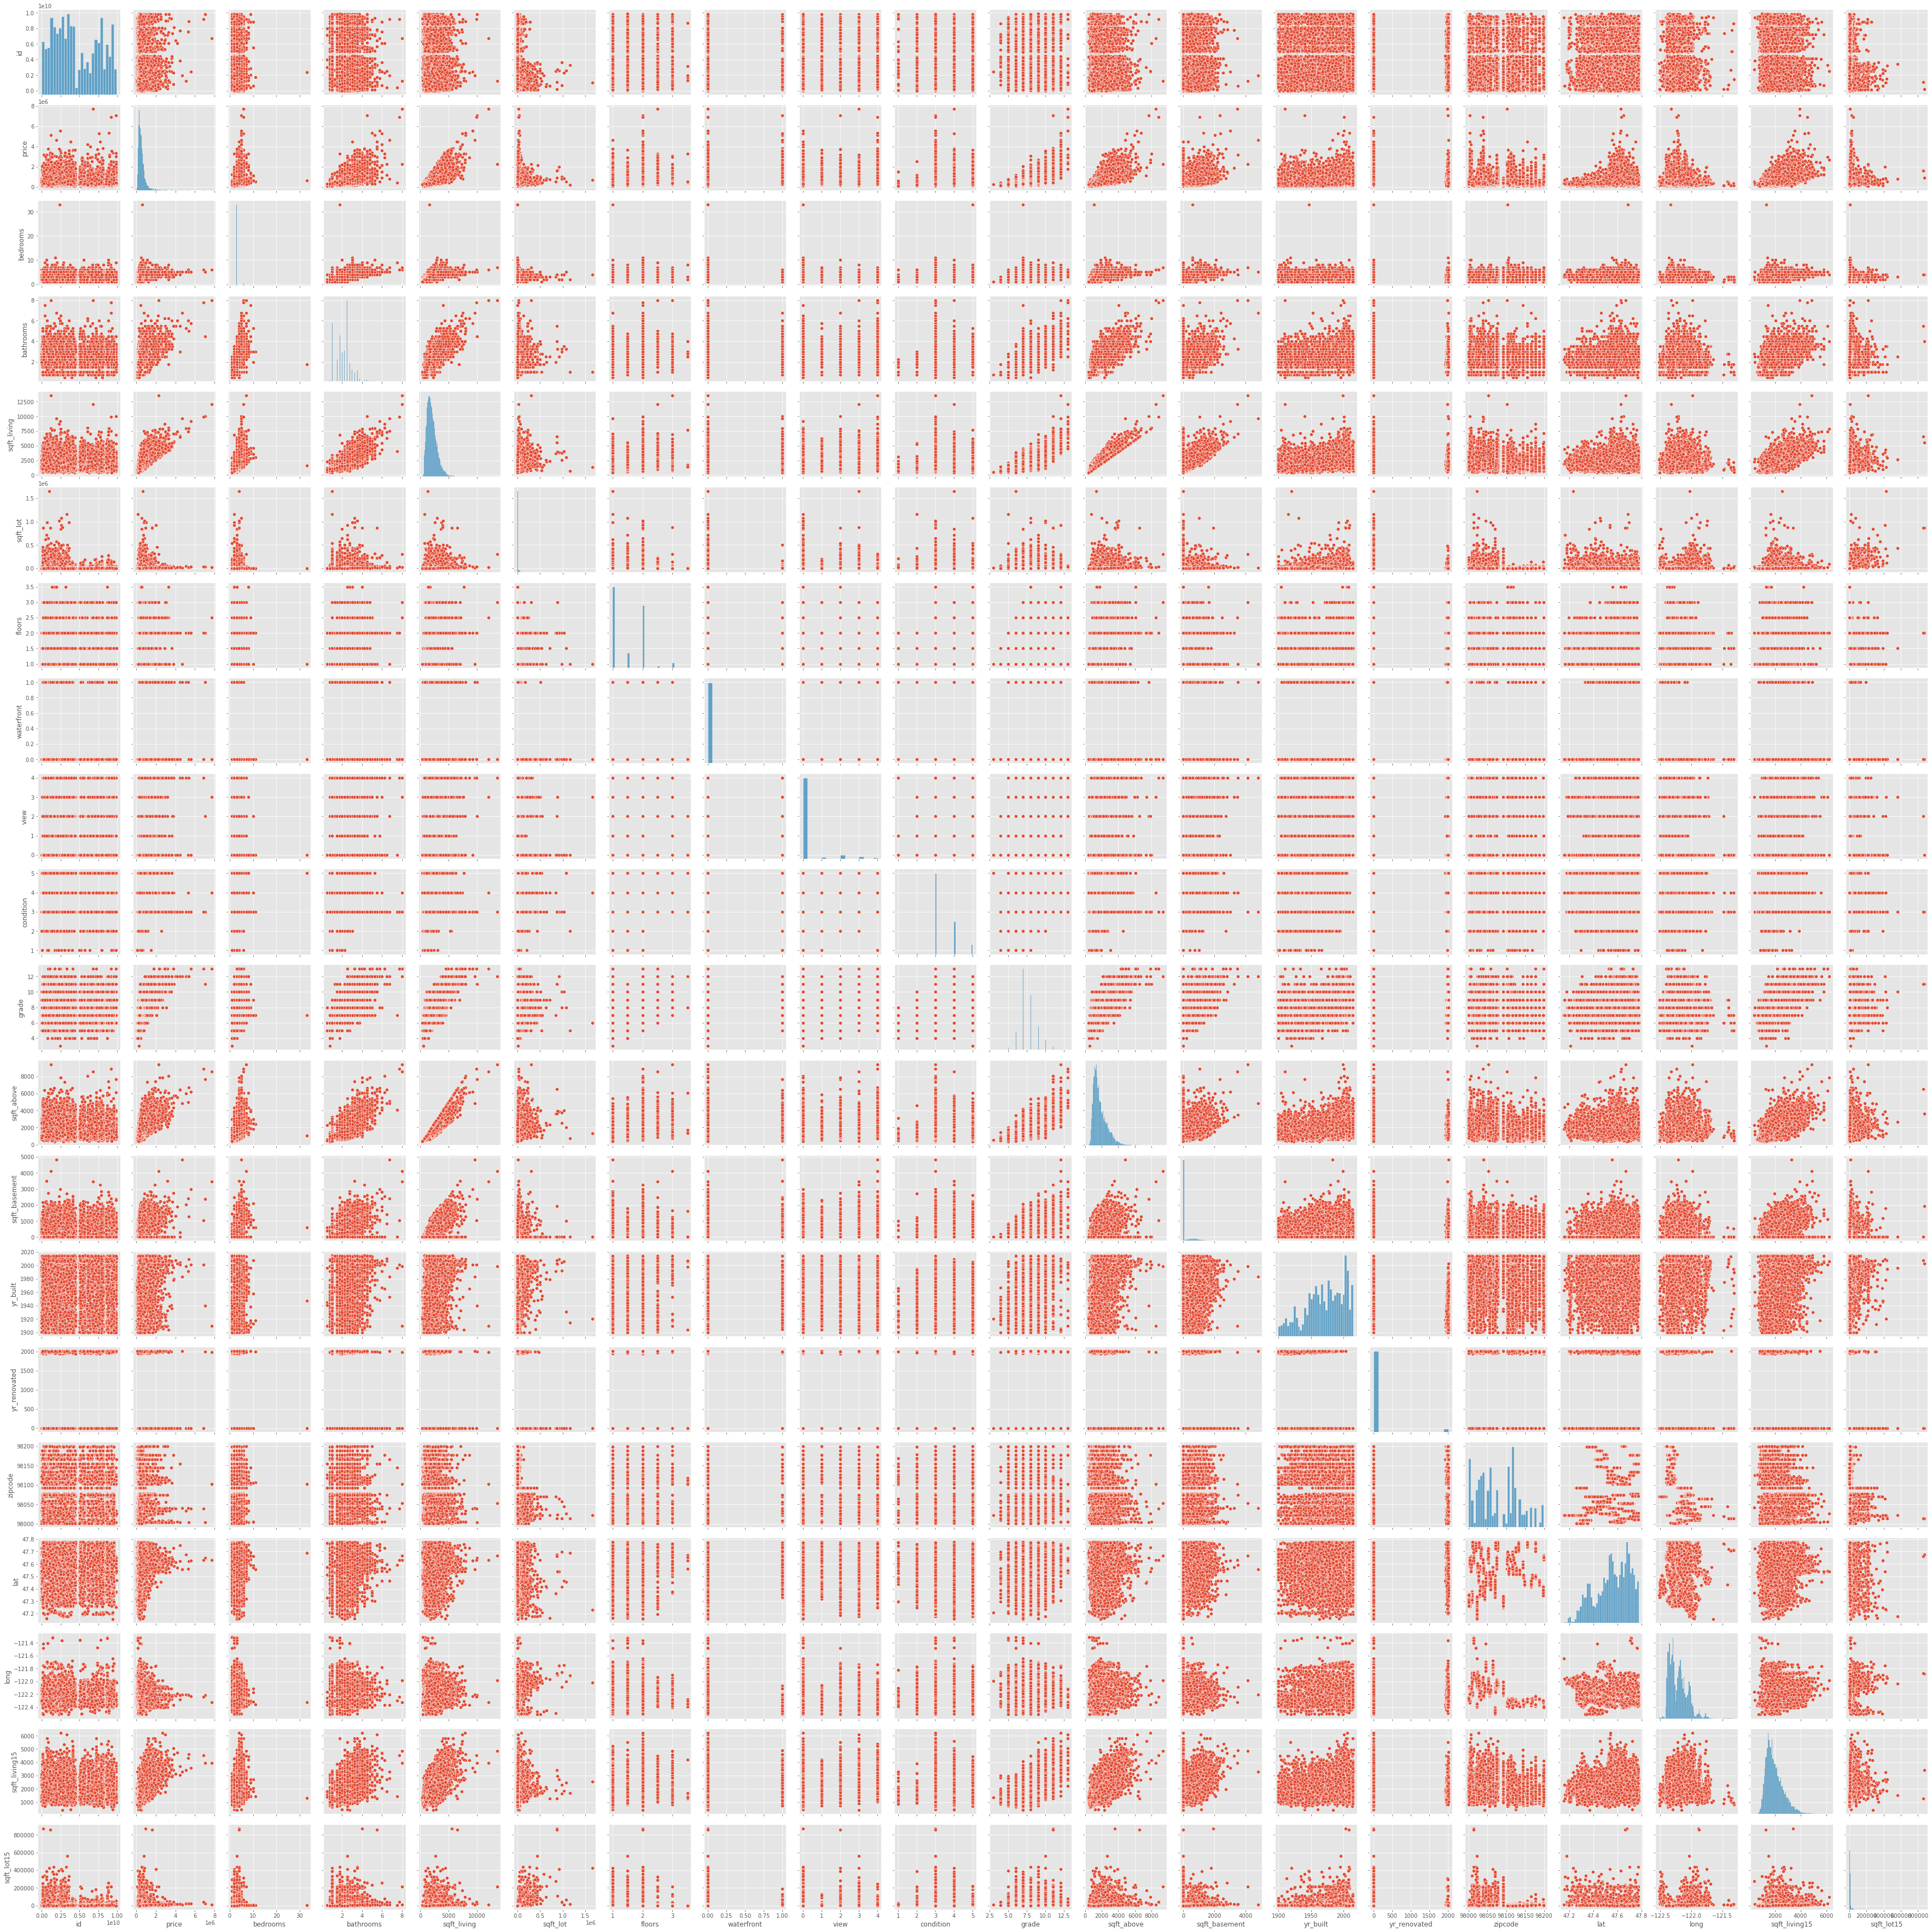

In [44]:
sns.pairplot(data=king_county_df)

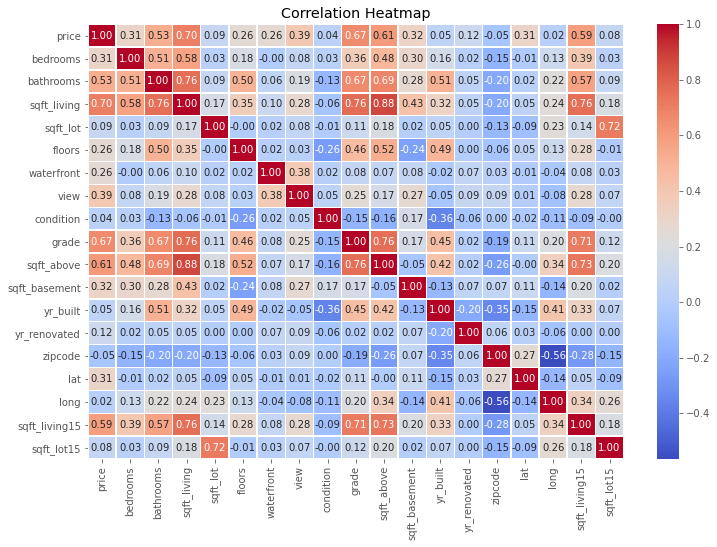

In [45]:
# Drop the 'id' column
df = king_county_df.drop(columns=['id'])

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Observation

**Variables Related to Price**
1. sqft_living with a correlation of 0.70,grade with a correlation of 0.67 and sqft_above with a correlation of 0.61 have a strong positive correlation with price. This suggest that a larger living area and a higher grade houses tend to have higher prices. Also the positive correlation in sqft_above indicates that as square footage above ground increases the price of the house tends to incrrease as well.

2. Bathrooms(0.53),view(0.40) both have a moderate positive correlation with price indicating that more bathrooms can lead to higher prices and houses with better view are generally priced higher.

3. There is a weak negative correlation between zipcode (-0.05) and price. This suggests that the specific location (zipcode) may not significantly impact the house price.

 **Strongly Related Variables**

1. sqft_living15 and sqft_lot15 have a correlation of 0.76, suggesting that the average square footage of interior housing living space for the nearest 15 neighbors and the average square footage of the land lots of the nearest 15 neighbors have a strong positive correlation with price. This indicates that as the square footage of these areas increases, the price of the house tends to increase as well.

2. bathrooms and sqft_living have a correlation of 0.75, suggesting that the number of bathrooms and the square footage of the living area have a strong positive correlation with price. This indicates that as the number of bathrooms increases, the price of the house tends to increase as well.

 **Negative Correlation**

The year built (yr_built) has a negative relationship with the zipcode (-0.35). This means that older houses tend to be located in certain zipcodes.





# Implementing Outlier Detection in Code

Checking for outliers in your data is crucial to ensure the robustness and reliability of your regression model. Outliers can significantly affect the model's coefficients and predictions. Here’s how you can detect and handle outliers in your dataset:

**Methods to Detect Outliers**
**Visual Inspection:**

**Box Plots:** Visualize the distribution of each numerical feature using box plots. Outliers typically appear as points beyond the whiskers of the box plot.

**Scatter Plots:** Plotting numerical features against the target variable or each other can reveal outliers visually.

**Statistical Methods:**

Z-Score: Calculate the Z-score for each numerical feature. Values with a Z-score greater than a threshold (typically 3 or -3) are considered outliers.
IQR (Interquartile Range): Calculate the IQR for each numerical feature. Values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers.

In [46]:
# Drop 'id' and 'date' columns if they are not needed for analysis
df = king_county_df.drop(columns=['id', 'date'])

In [47]:
# Handle missing values if any (example: fill with median)
df.fillna(df.median(), inplace=True)

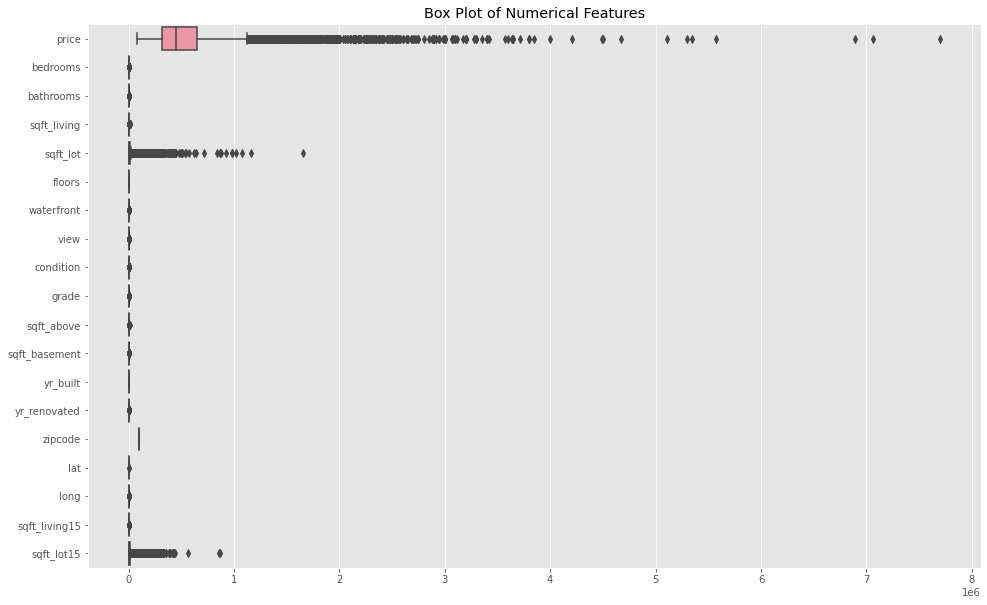

In [48]:
# Visualize outliers using box plots
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, orient='h')
plt.title('Box Plot of Numerical Features')
plt.show()

In [49]:
# Calculate Z-score for each numerical feature
z_scores = np.abs(zscore(df.select_dtypes(include=[float, int])))

# Define threshold for Z-score (example: 3)
threshold = 3

# Find indices of outliers
outlier_indices = np.argwhere(z_scores > threshold)

# Print indices and values of outliers
for idx, col_idx in outlier_indices:
    print(f'Outlier found in column "{df.columns[col_idx]}" at index {idx}, value: {df.iloc[idx, col_idx]}')

NameError: name 'zscore' is not defined